In [2]:
import cv2
from PIL import Image, ImageOps
import argparse
import os
import glob
import matplotlib.pyplot as plt
import multiprocessing as mp
from joblib import Parallel, delayed
import pydicom
import time
import numpy as np
import torch
import random
import pandas as pd
from pydicom.pixel_data_handlers import apply_windowing
import imageio
import time
import shutil

In [3]:
meta = pd.read_csv("E:/Download/wandb_export_2023-05-15T16_33_38.516+07_00.csv")
meta.head(5)

,Step,apricot-pine-6 - val/COCOAP50,apricot-pine-6 - val/COCOAP50__MIN,apricot-pine-6 - val/COCOAP50__MAX
0,110,0.528957,0.528957,0.528957
1,222,0.490828,0.490828,0.490828
2,334,0.990210,0.990210,0.990210
3,446,0.998645,0.998645,0.998645
4,558,0.999100,0.999100,0.999100


In [10]:
meta.rename(columns={"apricot-pine-6 - val/COCOAP50": 'MAP50'}, inplace=True)

In [11]:
meta

,Step,MAP50,apricot-pine-6 - val/COCOAP50__MIN,apricot-pine-6 - val/COCOAP50__MAX
0,110,0.528957,0.528957,0.528957
1,222,0.490828,0.490828,0.490828
2,334,0.990210,0.990210,0.990210
3,446,0.998645,0.998645,0.998645
4,558,0.999100,0.999100,0.999100
5,670,0.999548,0.999548,0.999548
6,782,1.000000,1.000000,1.000000
7,894,1.000000,1.000000,1.000000
8,1006,0.999548,0.999548,0.999548
9,1118,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'MPA50/VAL')

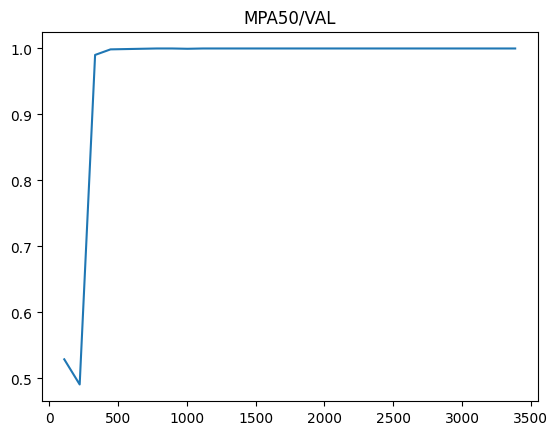

In [13]:
plt.plot(meta.Step, meta.MAP50)
plt.title('MPA50/VAL')

In [9]:
import plotly.express as px
fig = px.line(meta, x="Step", y="MAP50", title='MPA50/val')
fig.show()

In [14]:
metax = pd.read_csv("E:/Download/wandb_export_2023-05-15T16_40_50.231+07_00.csv")
metax.head(5)

,Step,apricot-pine-6 - val/COCOAP50_95,apricot-pine-6 - val/COCOAP50_95__MIN,apricot-pine-6 - val/COCOAP50_95__MAX
0,110,0.217293,0.217293,0.217293
1,222,0.201841,0.201841,0.201841
2,334,0.622910,0.622910,0.622910
3,446,0.707775,0.707775,0.707775
4,558,0.835879,0.835879,0.835879


In [15]:
metax.rename(columns={"apricot-pine-6 - val/COCOAP50_95": 'MAP50-95'}, inplace=True)

In [19]:
import plotly.express as px
fig = px.line(metax, x="Step", y="MAP50-95", title='MPA50-95/val')
fig.show()

Text(0.5, 1.0, 'MPA50-95/VAL')

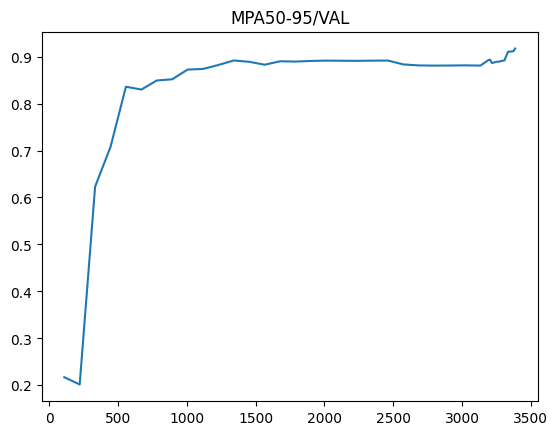

In [21]:
plt.plot(metax.Step, metax["MAP50-95"])
plt.title('MPA50-95/VAL')